In [119]:
import torch

import torch.nn as nn

#from nvae.utils import add_sn
#from nvae.vae_celeba import NVAE
import numpy as np
import matplotlib.pyplot as plt
#from nvae.utils import reparameterize
from torchvision import datasets, transforms


import os


In [120]:
device = ("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

from vae import VAE_big

model = VAE_big(device, image_channels=3).to(device)

train_data_size = 162079
epochs = 199

beta_value = 5.0


model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))


#model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))


model.eval()

VAE_big(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2))
    (13): ReLU()
    (14): Flatten()
  )
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1024, bias=True)
  (decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(1024, 256, kernel_size=(5, 5), stride=(2, 2))
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kern

In [121]:
desired_norm_l2 = 6.666609  # Change this to your desired constant value
desired_norm_l_inf = 0.9  # Change this to your desired constant value


noise_addition = (2.0 * torch.rand(1, 3, 64, 64).to(device) - 1.0) 

current_L_2_norm = torch.norm(noise_addition, 2)
current_L_inf_norm = torch.norm(noise_addition, p=float('inf'))

print("current_L_2_norm", current_L_2_norm)
print("current_L_inf_norm", current_L_inf_norm)


scaled_noise = noise_addition * (desired_norm_l2 / current_L_2_norm) *  (desired_norm_l_inf / current_L_inf_norm)


final_l2_norm = torch.norm(scaled_noise, 2)

print("final_l2_norm", final_l2_norm)

l_inf_norm_after_scaling = torch.norm(scaled_noise, p=float('inf'))

print("l_inf_norm_after_scaling", l_inf_norm_after_scaling)


# target l2 - 6.0, target l_inf - 0.094


current_L_2_norm tensor(63.8797, device='cuda:0')
current_L_inf_norm tensor(0.9999, device='cuda:0')
final_l2_norm tensor(6.0007, device='cuda:0')
l_inf_norm_after_scaling tensor(0.0939, device='cuda:0')


In [122]:
noise_addition.max(), noise_addition.min()

(tensor(0.9998, device='cuda:0'), tensor(-0.9999, device='cuda:0'))

In [123]:
scaled_noise.max(), scaled_noise.min()

(tensor(0.0939, device='cuda:0'), tensor(-0.0939, device='cuda:0'))

In [124]:
#from torch.utils.data import DataLoader
#from nvae.dataset import ImageFolderDataset

#dataset_path = '/home/luser/exploring_gans/celebA/img_align_celeba'

In [125]:
#train_ds = ImageFolderDataset(dataset_path, img_dim=64)
#train_dataloader = DataLoader(train_ds, batch_size=10, shuffle=True, num_workers=16)

# VAE plots

Young men selected segment 29

Od men selecte segment 0

Young women segment 5

Old women segment 15

# For Venilla VAE minimum and maximum damages of the group

## Min and max segments choosen from Vanilla VAE

In [126]:
# 0
model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
model.eval()

#segment = 14
prev_div_min = 100.0
prev_div_max = 0.0
all_losses = []
for segment in range(60):
    desired_norm_l_inf = 0.094

    #all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

    universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]

    all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
    feature = all_features[3]

    source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 



    image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
    aspect_ratio = image_width / image_height

    corresponding_class_polulations = [1819, 24707, 145, 2827]
    #inside_feature_name = inside_feature_names[3]



    actualOutput, _, _ = model(source_im)
    ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


    DivAttackeImage = source_im + optimized_noise
    NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
    DivOutput,_,_ = model(NormalDivAttackeImage)
    DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()

    all_losses.append(DivOutputL2ActualOutput.item())

all_losses

[0.11882364749908447,
 0.11421357095241547,
 0.11705395579338074,
 0.1326940357685089,
 0.20503753423690796,
 0.10335143655538559,
 0.23824438452720642,
 0.20018064975738525,
 0.1351553052663803,
 0.2127993106842041,
 0.1108216866850853,
 0.20641891658306122,
 0.2032763659954071,
 0.11684516072273254,
 0.153131902217865,
 0.13854950666427612,
 0.15534339845180511,
 0.13709697127342224,
 0.11546330153942108,
 0.11835213750600815,
 0.13861876726150513,
 0.11823173612356186,
 0.1252892017364502,
 0.12293732166290283,
 0.1528826802968979,
 0.16005843877792358,
 0.14040952920913696,
 0.15670210123062134,
 0.15107198059558868,
 0.2296549677848816,
 0.1376468539237976,
 0.17106132209300995,
 0.14378860592842102,
 0.11780845373868942,
 0.19488286972045898,
 0.15107916295528412,
 0.15202590823173523,
 0.17281469702720642,
 0.14555075764656067,
 0.18966250121593475,
 0.1504458785057068,
 0.15027666091918945,
 0.15967893600463867,
 0.12378206104040146,
 0.08983521163463593,
 0.11814302206039429,


# For Beta VAE with Beta  = 5.0 min and maximum damaged images

## Your VAE specific min and max segments

In [14]:
all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]

feature = all_features[0]


In [31]:
# 0
beta_value = 5.0
model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))

model.eval()

#segment = 14
prev_div_min = 100.0
prev_div_max = 0.0
all_losses = []
for segment in range(60):
    desired_norm_l_inf = 0.094

    #all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

    universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]

    all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
    #feature = all_features[0]

    source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 



    image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
    aspect_ratio = image_width / image_height

    corresponding_class_polulations = [1819, 24707, 145, 2827]
    #inside_feature_name = inside_feature_names[3]



    actualOutput, _, _ = model(source_im)
    ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


    DivAttackeImage = source_im + optimized_noise
    NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
    DivOutput,_,_ = model(NormalDivAttackeImage)
    DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()

    all_losses.append(DivOutputL2ActualOutput.item())


all_losses

[0.06129442900419235,
 0.05158115178346634,
 0.057689275592565536,
 0.06505363434553146,
 0.12078797817230225,
 0.04376918077468872,
 0.12154757976531982,
 0.14588981866836548,
 0.05520523712038994,
 0.10539157688617706,
 0.06681385636329651,
 0.10802273452281952,
 0.1287032961845398,
 0.04664761945605278,
 0.07966267317533493,
 0.06958658993244171,
 0.0693441778421402,
 0.05803757533431053,
 0.06199679523706436,
 0.06238064169883728,
 0.08545659482479095,
 0.08952440321445465,
 0.07165833562612534,
 0.04749109596014023,
 0.06978633254766464,
 0.0762062519788742,
 0.07136154174804688,
 0.07153536379337311,
 0.08734848350286484,
 0.16257834434509277,
 0.06000325083732605,
 0.09055473655462265,
 0.09278953075408936,
 0.04615098237991333,
 0.08816017955541611,
 0.09305953979492188,
 0.06255121529102325,
 0.09293856471776962,
 0.0697648823261261,
 0.12055572122335434,
 0.06919044256210327,
 0.06454701721668243,
 0.06344708800315857,
 0.06344028562307358,
 0.03999592363834381,
 0.0417077653

In [127]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
all_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
all_men_list = os.listdir(all_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all men List: ", len(all_men_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
all_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
all_women_list = os.listdir(all_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all women List: ", len(all_women_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_young_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
all_young_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
all_young_list = os.listdir(all_young_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all young List: ", len(all_young_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_old_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
all_old_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
all_old_list = os.listdir(all_old_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all old List: ", len(all_old_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
young_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
young_men_list = os.listdir(young_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young men List: ", len(young_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
old_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
old_men_list = os.listdir(old_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old men List: ", len(old_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
old_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
old_women_list = os.listdir(old_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old women List: ", len(old_women_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
young_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
young_women_list = os.listdir(young_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young women List: ", len(young_women_list))


all men List:  84434
all women List:  118165
all young List:  156734
all old List:  45865
young men List:  53447
old men List:  7003
old women List:  1116
young women List:  103287


In [128]:
desired_norm_l_inf = 0.094
#universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]
all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[3]

source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[:60].to(device) 
source_im.shape

torch.Size([60, 3, 64, 64])

# Autoencode and TSNE  to get them uin 2d

In [129]:
model.eval()
with torch.no_grad():
    ae_perturbed_embeds = model.encoder(source_im) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
    mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
    std1 = logvar1.mul(0.5).exp_()
    esp1 = torch.randn(*mu1.size()).to(device)
    attackeded_z1 = mu1 + std1 * esp1
print("z1.shape", attackeded_z1.shape)


z1.shape torch.Size([60, 256])


In [131]:
parent_addresses = [all_men_parent, all_women_parent, all_young_parent, all_old_parent, young_men_parent, old_men_parent, young_women_parent, old_women_parent]
considered_lists = [all_men_list, all_women_list, all_young_list, all_old_list, young_men_list, old_men_list, young_women_list, old_women_list]

In [132]:
all_latent_groups_merged = torch.tensor([]).to(device)

for ind in range(4, 8):
    print("ind: ", ind)
    transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
            ])

    batch_size = 1000

    print("parent_addresses[ind]: ", parent_addresses[ind])

    celeba_data = datasets.ImageFolder(parent_addresses[ind], transform=transform)
    print("celeba_data: ", len(celeba_data))
    considered_list = considered_lists[ind]

    print("considered_list: ", len(considered_list))

    train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 1.0), len(considered_list) - int(len(considered_list) * 1.0)])
    train_data_size = len(train_set)
    test_data_size = len(test_set)

    trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)


    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)
        break


    model.eval()
    with torch.no_grad():
        ae_perturbed_embeds = model.encoder(images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
        mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
        std1 = logvar1.mul(0.5).exp_()
        esp1 = torch.randn(*mu1.size()).to(device)
        z1 = mu1 + std1 * esp1
    print("z1.shape", z1.shape)
    all_latent_groups_merged = torch.cat((all_latent_groups_merged, z1), 0)
    print("all_latent_groups_merged.shape", all_latent_groups_merged.shape)


ind:  4
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d
celeba_data:  53447
considered_list:  53447
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([1000, 256])
ind:  5
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d
celeba_data:  7003
considered_list:  7003
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([2000, 256])
ind:  6
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d
celeba_data:  103287
considered_list:  103287
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([3000, 256])
ind:  7
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d
celeba_data:  1116
considered_list:  1116
z1.shape torch.Size([1000, 256])
all_latent_groups_merged.shape torch.Size([40

In [133]:
all_latent_groups_merged = torch.cat((all_latent_groups_merged, attackeded_z1), 0)


In [136]:
all_latent_groups_merged.shape

torch.Size([4060, 256])

In [135]:
import torch
import numpy as np
from openTSNE import TSNE
from openTSNE.affinity import PerplexityBasedNN

# Check if a GPU is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Assuming your data is a torch tensor of size [63325, 256]
#data = torch.randn(63325, 256)  # Example tensor
data = all_latent_groups_merged.to(device)

# Convert the tensor to a NumPy array
data_np = data.cpu().numpy()

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    n_jobs=-1,
    random_state=42,
    negative_gradient_method="fft"  # Use FFT-based gradient calculation for speed
)

# Fit and transform the data
embedding = tsne.fit(data_np)

# Convert the result back to a torch tensor
data_tsne_tensor = torch.tensor(embedding, device=device)

# Check the size of the reduced tensor
print(data_tsne_tensor.shape)  # Should print torch.Size([63325, 2])


torch.Size([4060, 2])


In [137]:
data_tsne_tensor = data_tsne_tensor.cpu().numpy()   

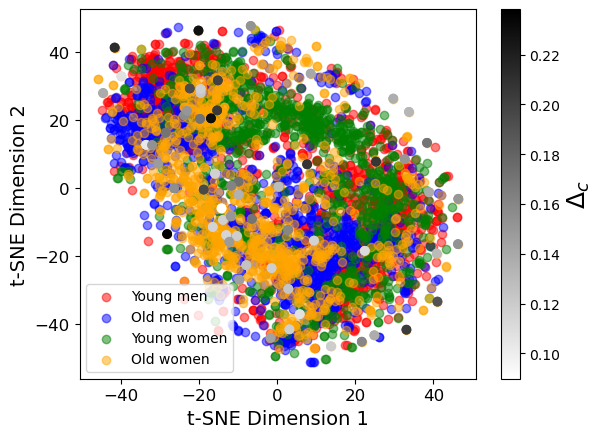

In [169]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

# Plot each group separately with specified colors and labels
plt.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=0.5)
plt.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=0.5)
plt.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=0.5)
plt.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=0.5)

plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()



# Add legend
plt.legend()

# Show plot
plt.show()


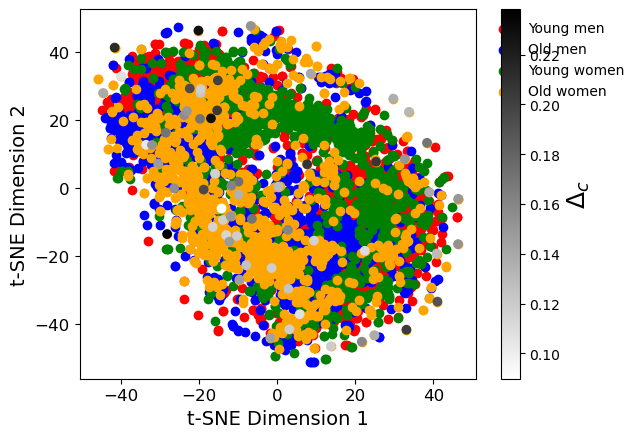

In [172]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

# Plot each group separately with specified colors and labels
plt.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=1.0)
plt.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=1.0)
plt.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=1.0)
plt.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=1.0)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()



# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Show plot
plt.show()


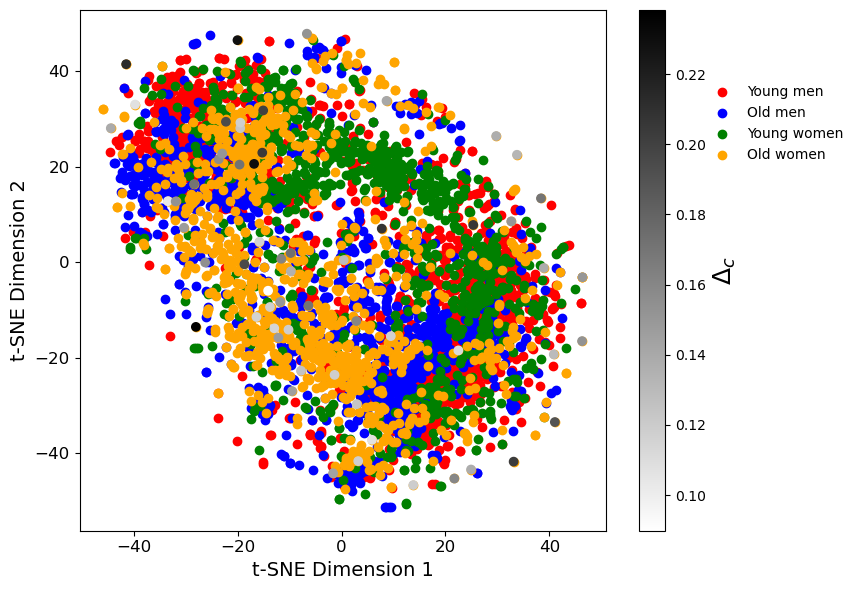

In [185]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))


# Plot each group separately with specified colors and labels
ax.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=1.0)
ax.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=1.0)
ax.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=1.0)
ax.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=1.0)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = ax.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=5., frameon=False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


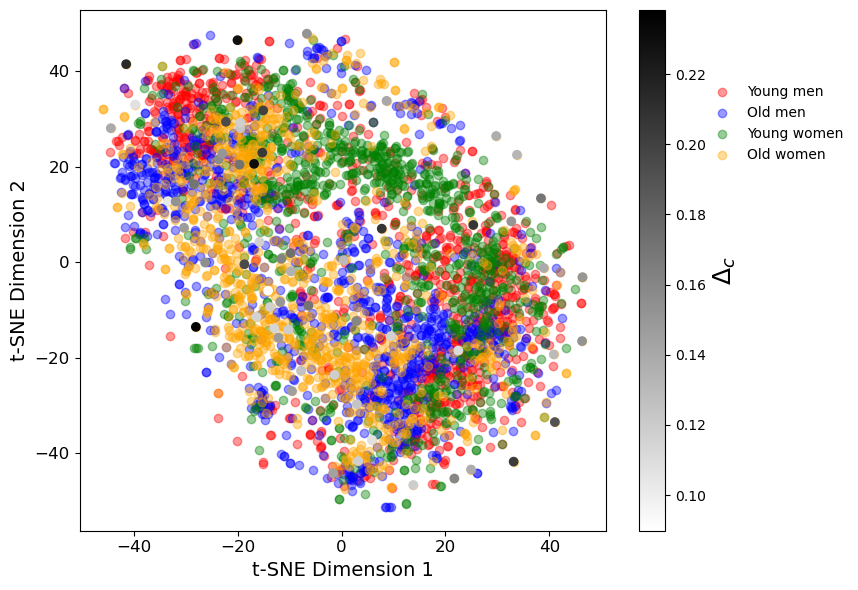

In [192]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))


# Plot each group separately with specified colors and labels
ax.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=0.4)
ax.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=0.4)
ax.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=0.4)
ax.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=0.4)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = ax.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=5., frameon=False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


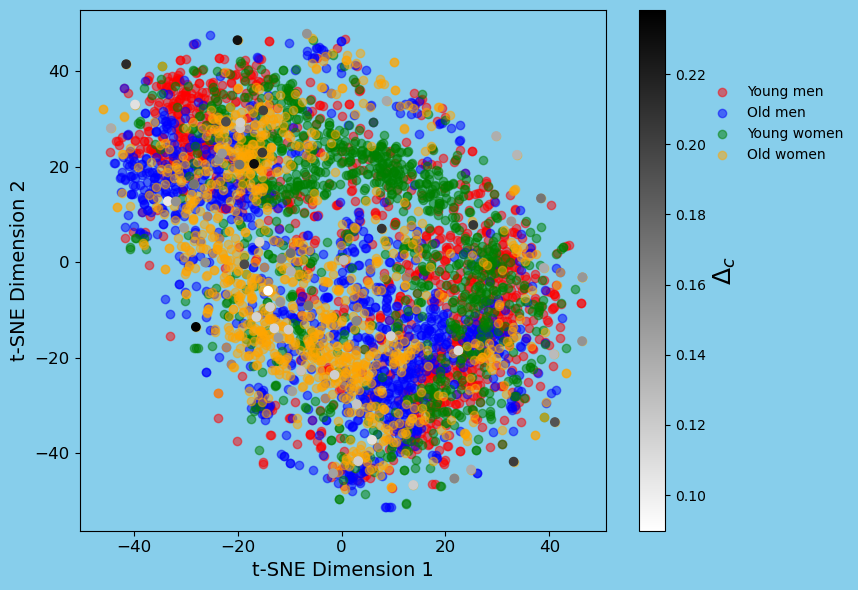

In [193]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
fig.patch.set_facecolor('skyblue')
ax.set_facecolor('skyblue')


# Plot each group separately with specified colors and labels
ax.scatter(data_tsne_tensor[0*batch_size:1*batch_size, 0], data_tsne_tensor[0*batch_size:1*batch_size, 1], color=colors[0], label=labels[0], alpha=0.5)
ax.scatter(data_tsne_tensor[1*batch_size:2*batch_size, 0], data_tsne_tensor[1*batch_size:2*batch_size, 1], color=colors[1], label=labels[1], alpha=0.5)
ax.scatter(data_tsne_tensor[2*batch_size:3*batch_size, 0], data_tsne_tensor[2*batch_size:3*batch_size, 1], color=colors[2], label=labels[2], alpha=0.5)
ax.scatter(data_tsne_tensor[3*batch_size:4*batch_size, 0], data_tsne_tensor[3*batch_size:4*batch_size, 1], color=colors[3], label=labels[3], alpha=0.5)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
scatter = ax.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
cbar = plt.colorbar(scatter)
cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=5., frameon=False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()
